In [2]:
# load modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/home/lubo/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Summary tables

In [162]:
raw_data="../raw_data"
data_path=f"{raw_data}/phyl_placement/vampyrellida/downstream_analyses/tax_assignment/tax_assign_summary_table.tsv"

sum_table=pd.read_csv(data_path, sep="\t")

In [163]:
# Adjust summary table

# get rid off allsamples otus
sum_table=sum_table[sum_table["sample_id"] != "allsamples"]

# get sample as a categorical variable into indicator (1/0) variable
sum_table=pd.get_dummies(sum_table, columns=["sample_id"], prefix="", prefix_sep="")

# split the taxopath column into individual columns (each for one taxon level)
taxpath_labels=["Kingdom", "Domain", "Phyllum", "Class", "Order", "Family", "Genus", "Species"]
sum_table[taxpath_labels]=sum_table["taxopath"].str.split(pat=";", expand=True)
sum_table=sum_table.drop(columns=["taxopath"])

sum_table.sort_values(by="otu_id", inplace=True)

In [165]:
# save as tsv
raw_data="../raw_data"
data_path=f"{raw_data}/phyl_placement/vampyrellida/downstream_analyses/results"

sum_table.to_csv(f"{data_path}/summary_table.tsv", sep="\t", index=False)

## Comparing taxonomic assignment and phylogenetic placement methods

### Load data

In [167]:
# taxonomic assignment table
marker="Full18S"
cell="cellCombined"
sim="sim99"
raw_data="../raw_data"
data_path=f"{raw_data}/OTU_summary_tables/otu_summary_table_{marker}_{cell}_{sim}.tsv"
tax_assign=pd.read_csv(data_path, sep="\t")
tax_assign=tax_assign[tax_assign["Order"] == "Vampyrellida"] # filter only vampyrellids
tax_assign=tax_assign.drop(columns=["Sequence"]) # drop the sequence column that we don't need

In [171]:
# phylogenetic placement
raw_data="../raw_data"
data_path=f"{raw_data}/phyl_placement/vampyrellida/downstream_analyses/tax_assignment/tax_assign_summary_table.tsv"

phyl_placement=pd.read_csv(data_path, sep="\t")
phyl_placement=phyl_placement[phyl_placement["sample_id"] == "allsamples"]
# split the taxopath column into individual columns (each for one taxon level)
taxpath_labels=["Kingdom", "Domain", "Phyllum", "Class", "Order", "Family", "Genus", "Species"]
phyl_placement[taxpath_labels]=phyl_placement["taxopath"].str.split(pat=";", expand=True)
phyl_placement=phyl_placement.drop(columns=["taxopath"])

In [172]:
phyl_placement

,otu_id,sample_id,lwr,Kingdom,Domain,Phyllum,Class,Order,Family,Genus,Species
0,084e07bed6d405882c51c4761b10319c,allsamples,0.014460,Eukaryota,Rhizaria,Cercozoa,Endomyxa,Vampyrellida,Leptophryidae,Arachnomyxa,Arachnomyxa_cryptophaga
1,1789528193bfa8745d87c2da6cf3e5d3,allsamples,0.736200,Eukaryota,Rhizaria,Cercozoa,Endomyxa,Vampyrellida,Leptophryidae,None,None
2,17dd4ebd91cc236a7ea6c52373384bbe,allsamples,0.934200,Eukaryota,Rhizaria,Cercozoa,Endomyxa,Vampyrellida,Thalassomyxa_clade,None,None
3,472118fe46f7c580e02ea4275241ddb0,allsamples,0.000248,Eukaryota,Rhizaria,Cercozoa,Endomyxa,Vampyrellida,Leptophryidae,Arachnomyxa,Arachnomyxa_cryptophaga
4,70b7cf2cb7c70245a8ea9a860886dbce,allsamples,1.000000,Eukaryota,Rhizaria,Cercozoa,Endomyxa,Vampyrellida,Leptophryidae,None,None
5,7ef9d52dc97ffcdb9b27af0b7735d0e0,allsamples,0.981700,Eukaryota,Rhizaria,Cercozoa,Endomyxa,Vampyrellida,Leptophryidae,Arachnomyxa,Arachnomyxa_cryptophaga
6,823b2339750e633e41ceda7d1ce1d5a3,allsamples,0.616900,Eukaryota,Rhizaria,Cercozoa,Endomyxa,Vampyrellida,Leptophryidae,Leptophrys,Leptophrys_vorax
7,91b1f98492eba26f9f791cf7949afb56,allsamples,0.000139,Eukaryota,Rhizaria,Cercozoa,Endomyxa,Vampyrellida,Leptophryidae,Arachnomyxa,Arachnomyxa_cryptophaga
8,93ec799fa70cc9a684fdbec04fb423d8,allsamples,0.844400,Eukaryota,Rhizaria,Cercozoa,Endomyxa,Vampyrellida,None,None,None
9,a1927e68ef1d297f2ebcaa07a4e68de2,allsamples,0.353900,Eukaryota,Rhizaria,Cercozoa,Endomyxa,Vampyrellida,Vampyrellidae,Vampyrella,Vampyrella_lateritia


In [192]:
# prepare data for plotting
tax_levels=["Order", "Family", "Genus", "Species"]
data={"taxonomy": [],
     "count": [],
     "method": []}

for tax_level in tax_levels:
    # loop for the taxonomic assignment part
    data["taxonomy"].append(tax_level)
    data["count"].append(tax_assign[tax_level].count())
    data["method"].append("taxonomic assignment")
    # loop for the phylogenetic placement part
    data["taxonomy"].append(tax_level)
    data["count"].append(phyl_placement[tax_level].count())
    data["method"].append("phylogenetic placement")

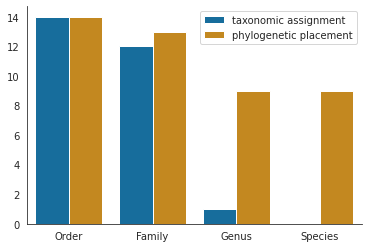

In [194]:
# plotting
raw_data="../raw_data"
data_path=f"{raw_data}/phyl_placement/vampyrellida/downstream_analyses/results"


sns.set_style("white")
sns.barplot(data=data, x="taxonomy", y="count", hue="method", palette="colorblind")
sns.despine();

# save
plt.savefig(f"{data_path}/assignment_method_comparison.png", dpi=300, transparent=False, facecolor='white')